<a href="https://colab.research.google.com/github/alachaudhary/AI_LAB/blob/main/F2021266434.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import gensim
from gensim.models import FastText
import random
from tabulate import tabulate
from tqdm import tqdm
import tensorflow as tf

In [ ]:
import nltk
import subprocess
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('punkt', download_dir='/kaggle/working/')
    nltk.download('wordnet', download_dir='/kaggle/working/')
    nltk.download('stopwords', download_dir='/kaggle/working/')
    nltk.download('wordnet', download_dir='/kaggle/working/')
    nltk.download('averaged_perceptron_tagger', download_dir='/kaggle/working/')

    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /kaggle/working/...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data] Downloading package stopwords to /kaggle/working/...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /kaggle/working/...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df = pd.read_csv('/content/archive.zip',
                 encoding = 'latin',header=None)

df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('user_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sentiment']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sentiment'}, axis=1)
              .sort_values('sentiment', ascending=True))
  xs = counted['sentiment']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('sentiment', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sentiment')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sentiment']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sentiment'}, axis=1)
              .sort_values('sentiment', ascending=True))
  xs = counted['sentiment']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('sentiment', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='user_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sentiment')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sentiment']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sentiment'}, axis=1)
              .sort_values('sentiment', ascending=True))
  xs = counted['sentiment']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('sentiment', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sentiment')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user_id'].value_counts()
    for x_label, grp in _df_9.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('user_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_10.groupby('user_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user_id')
_ = plt.ylabel('text')

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='id', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['user_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='id', y='user_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='id', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Define a dictionary to map sentiment values
sentiment_mapping = {0: "Negative", 4: "Positive"}

# Map the 'sentiment' column using the defined dictionary
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


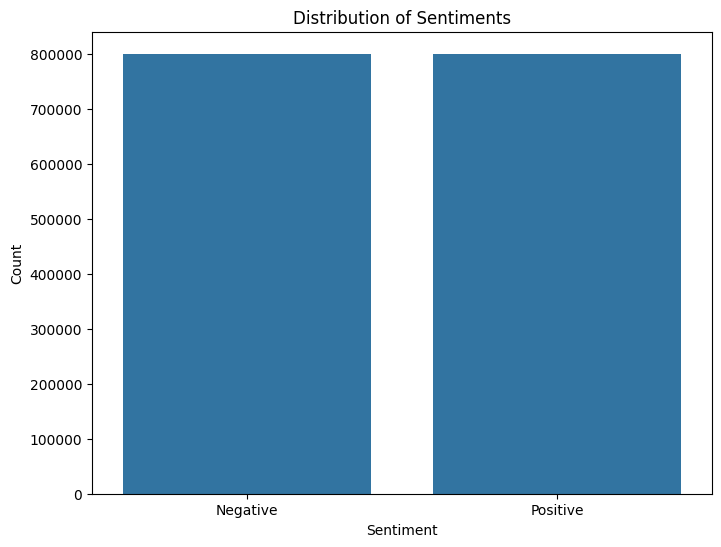

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Adding labels and title
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show plot
plt.show()

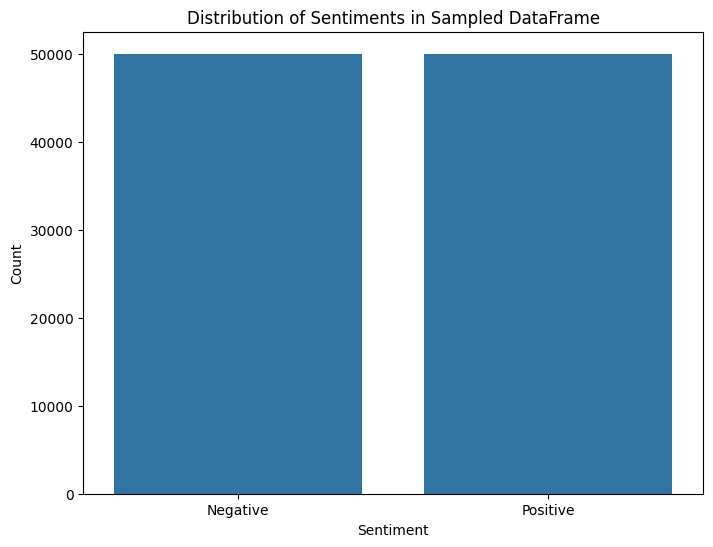

In [ ]:
# Generate a sample DataFrame with the same distribution of classes
sample_size = 100000

# Randomly sample 100000 rows from each class
sampled_df = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(int(sample_size/2)))

# Reset the index of the sampled DataFrame
sampled_df.reset_index(drop=True, inplace=True)

# Count the occurrences of each sentiment category in the sampled DataFrame
sentiment_counts = sampled_df['sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Adding labels and title
plt.title('Distribution of Sentiments in Sampled DataFrame')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show plot
plt.show()

In [ ]:
def remove_usernames(text):
    # Remove usernames (mentions) from the text
    return re.sub(r'@\w+', '', text)

def tokenize_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    return tokens

def normalize_tokens(tokens):
    # Normalize tokens to lowercase
    normalized_tokens = [token.lower() for token in tokens]
    return normalized_tokens

def clean_tokens(tokens):
    # Filter out non-alphanumeric tokens and usernames (mentions)
    cleaned_tokens = [token for token in tokens if token.isalnum() and not token.isdigit() and not token.startswith('@')]
    return cleaned_tokens

def remove_stopwords(tokens):
    # Remove stop words from tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

def lemmatize_tokens(tokens):
    # Lemmatize tokens based on part of speech
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token in tokens:
        pos_tag = nltk.pos_tag([token])[0][1][0].upper()
        pos_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
        wordnet_pos = pos_map.get(pos_tag, wordnet.NOUN)
        lemma = lemmatizer.lemmatize(token, pos=wordnet_pos)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

def filter_meaningful_tokens(tokens):
    # Filter tokens based on length and presence in WordNet
    meaningful_tokens = [token for token in tokens if len(token) >= 3]
    return meaningful_tokens

def preprocess_text(text):
    # Step 1: Remove usernames
    text = remove_usernames(text)

    # Step 2: Tokenize text
    tokens = tokenize_text(text)

    # Step 3: Normalize tokens
    normalized_tokens = normalize_tokens(tokens)

    # Step 4: Clean tokens (including removing usernames)
    cleaned_tokens = clean_tokens(normalized_tokens)

    # Step 5: Remove stop words
    filtered_tokens = remove_stopwords(cleaned_tokens)

    # Step 6: Lemmatize tokens
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)

    # Step 7: Filter meaningful tokens
    meaningful_tokens = filter_meaningful_tokens(lemmatized_tokens)

    # Join tokens into preprocessed text
    preprocessed_text = ' '.join(meaningful_tokens)

    return preprocessed_text

In [ ]:
# Apply preprocessing function to 'text' column of the DataFrame
sampled_df['cleaned_text'] = sampled_df['text'].apply(preprocess_text)

# Display the DataFrame with cleaned text
sampled_df.head(10)

,sentiment,text,cleaned_text
0,Negative,I've literally spent the past 4 and a half hou...,literally spent past half hour work god hate d...
1,Negative,thankin my lucky stars my grammy is ok w/her 4...,thankin lucky star grammy fracture rib ugh
2,Negative,Forgot about me already.,forgot already
3,Negative,Of course a plane must crash when I'm about to...,course plane must crash overseas
4,Negative,@movies_ie I'm looking forward to seeing it bu...,look forward see make tonight
5,Negative,"Waiting for my interview at waji hq, good luck...",wait interview waji good luck shes take foreve...
6,Negative,Feels absolutely pants.,feel absolutely pant
7,Negative,Is not happy with the weather I'm off to the ...,happy weather museum later boy soak culture ap...
8,Negative,has a tummy ache,tummy ache
9,Negative,@SquiggleMum Poor lovey Have you got a ring s...,poor lovey get ring sling would lose without m...


In [ ]:
# Define the file path and name for the CSV file
csv_file_path = '/kaggle/working/sample_dataframe.csv'

# Export the DataFrame to CSV
sampled_df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been exported to {csv_file_path}.")

DataFrame has been exported to /kaggle/working/sample_dataframe.csv.


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = sampled_df['cleaned_text']
y = sampled_df['sentiment']

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sentiment labels to numerical format
y_train_numeric = (y_train == 'Positive').astype(int)
y_test_numeric = (y_test == 'Positive').astype(int)

# Displaying the shapes of the new DataFrames
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (80000,)
Testing data shape: (20000,)


In [ ]:
# Convert 'cleaned_text' from training data (X_train) to list of sentences
train_sentences = [text.split() for text in X_train]

# Train FastText model
model = FastText(sentences=train_sentences, vector_size=30, window=2, min_count=1, sg=1, epochs=100)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize and convert text data to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure uniform length
max_len = 30
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

In [ ]:
# Prepare embedding matrix from FastText model
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, 30))  # Assuming vector_size=30 in FastText
for word, i in word_index.items():
    if word in model.wv:
        embedding_matrix[i] = model.wv[word]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# Build simplified CNN model
model_1 = Sequential()

model_1.add(Embedding(vocab_size, 30, weights=[embedding_matrix], input_length=max_len, trainable=False))

model_1.add(Conv1D(32, 3, activation='relu'))
model_1.add(MaxPooling1D(pool_size=2))

model_1.add(Conv1D(64, 3, activation='relu'))
model_1.add(MaxPooling1D(pool_size=2))

model_1.add(Conv1D(128, 3, activation='relu'))
model_1.add(GlobalMaxPooling1D())

model_1.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 30)            1159920   
                                                                 
 conv1d (Conv1D)             (None, 28, 32)            2912      
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            2

In [ ]:
# Train the model with numerical labels and store the training history
history_1 = model_1.fit(X_train_padded, y_train_numeric, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 13s 6ms/step - loss: 0.5605 - accuracy: 0.7115 - val_loss: 0.5383 - val_accuracy: 0.7274
Epoch 2/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.5239 - accuracy: 0.7372 - val_loss: 0.5352 - val_accuracy: 0.7306
Epoch 3/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5093 - accuracy: 0.7467 - val_loss: 0.5418 - val_accuracy: 0.7315
Epoch 4/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.4993 - accuracy: 0.7531 - val_loss: 0.5270 - val_accuracy: 0.7348
Epoch 5/10
2000/2000 [==============================] - 13s 7ms/step - loss: 0.4903 - accuracy: 0.7592 - val_loss: 0.5345 - val_accuracy: 0.7311
Epoch 6/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4809 - accuracy: 0.7644 - val_loss: 0.5549 - val_accuracy: 0.7234
Epoch 7/10
2000/2000 [==============================] - 13s 7ms/step - loss: 0.4732 - accuracy: 0.7692 - val_loss: 0.5458 - val_ac

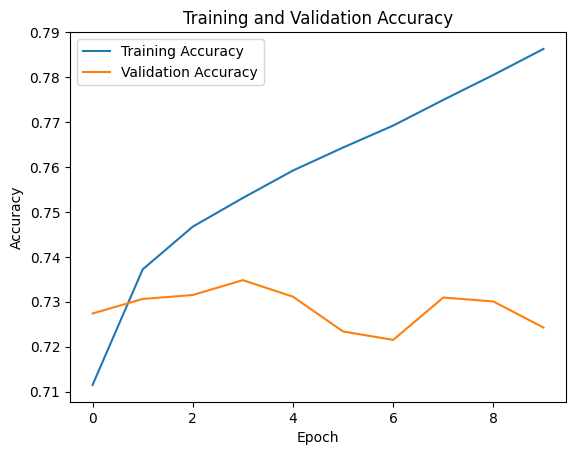

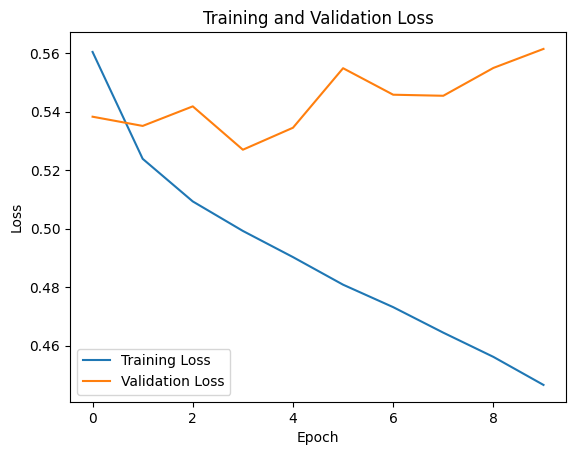

In [ ]:
# Plot training and validation accuracy
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

625/625 [==============================] - 3s 4ms/step


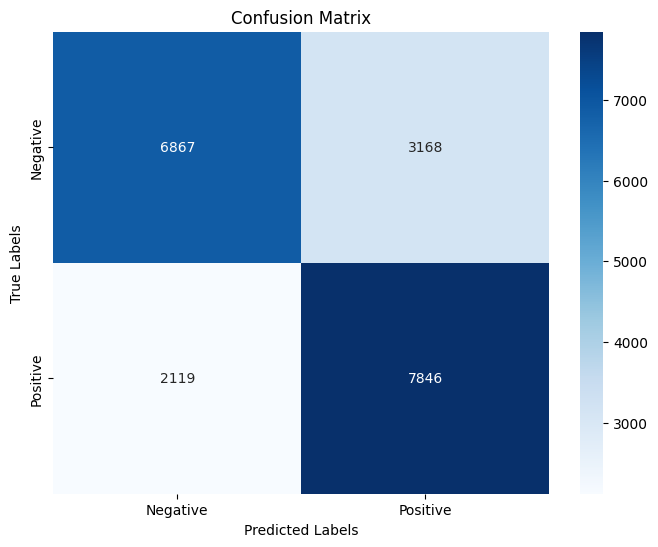

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72     10035
           1       0.71      0.79      0.75      9965

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.73     20000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes on test data
y_pred = (model_1.predict(X_test_padded) > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_numeric, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display classification report
report = classification_report(y_test_numeric, y_pred)
print("Classification Report:")
print(report)

In [ ]:
# Build simplified CNN model
model_2 = Sequential()

model_2.add(Embedding(vocab_size, 30, weights=[embedding_matrix], input_length=max_len, trainable=False))

model_2.add(Conv1D(32, 5, activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))

model_2.add(Flatten())

model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))

model_2.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 30)            1159920   
                                                                 
 conv1d_3 (Conv1D)           (None, 26, 32)            4832      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 13, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 416)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                26688     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

In [ ]:
# Train the model with numerical labels and store the training history
history_2 = model_2.fit(X_train_padded, y_train_numeric, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.5748 - accuracy: 0.6982 - val_loss: 0.5418 - val_accuracy: 0.7232
Epoch 2/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.5340 - accuracy: 0.7323 - val_loss: 0.5303 - val_accuracy: 0.7334
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5189 - accuracy: 0.7420 - val_loss: 0.5297 - val_accuracy: 0.7311
Epoch 4/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.5105 - accuracy: 0.7483 - val_loss: 0.5368 - val_accuracy: 0.7341
Epoch 5/10
2000/2000 [==============================] - 13s 7ms/step - loss: 0.5022 - accuracy: 0.7521 - val_loss: 0.5297 - val_accuracy: 0.7334
Epoch 6/10
2000/2000 [==============================] - 15s 7ms/step - loss: 0.4931 - accuracy: 0.7578 - val_loss: 0.5332 - val_accuracy: 0.7326
Epoch 7/10
2000/2000 [==============================] - 9s 5ms/step - loss: 0.4875 - accuracy: 0.7610 - val_loss: 0.5367 - val_accurac

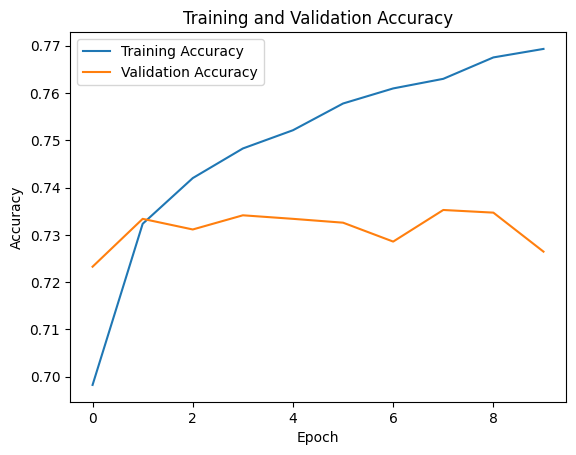

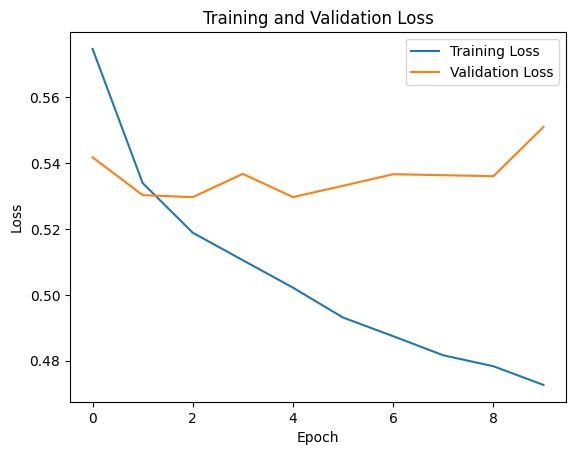

In [ ]:
# Plot training and validation accuracy
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

625/625 [==============================] - 2s 3ms/step


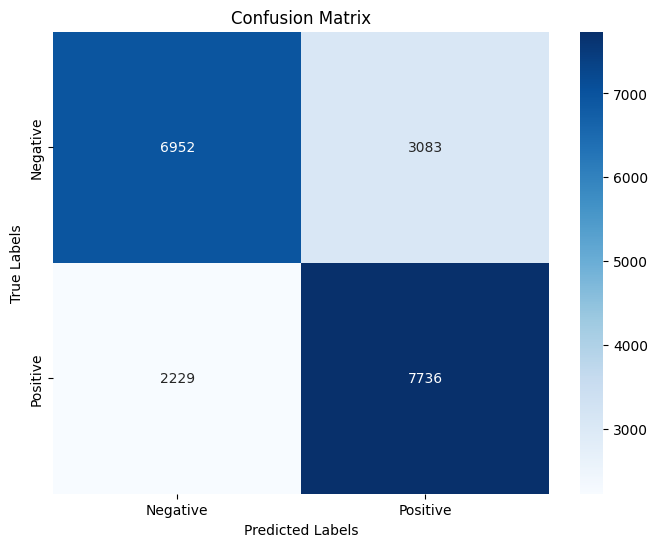

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72     10035
           1       0.72      0.78      0.74      9965

    accuracy                           0.73     20000
   macro avg       0.74      0.73      0.73     20000
weighted avg       0.74      0.73      0.73     20000



In [ ]:
# Predict classes on test data
y_pred = (model_2.predict(X_test_padded) > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_numeric, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display classification report
report = classification_report(y_test_numeric, y_pred)
print("Classification Report:")
print(report)

In [ ]:
# Build simplified CNN model
model_3 = Sequential()

model_3.add(Embedding(vocab_size, 30, weights=[embedding_matrix], input_length=max_len, trainable=False))

model_3.add(Dropout(0.3))

model_3.add(Conv1D(300, 3, activation='relu'))
model_3.add(GlobalMaxPooling1D())

model_3.add(Dense(200, activation='relu'))
model_3.add(Dropout(0.3))

model_3.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 30)            1159920   
                                                                 
 dropout_1 (Dropout)         (None, 30, 30)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 28, 300)           27300     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 300)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_3 (Dense)             (None, 200)               60200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                      

In [ ]:
# Train the model with numerical labels and store the training history
history_3 = model_3.fit(X_train_padded, y_train_numeric, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
2000/2000 [==============================] - 20s 9ms/step - loss: 0.5907 - accuracy: 0.6811 - val_loss: 0.5405 - val_accuracy: 0.7296
Epoch 2/30
2000/2000 [==============================] - 16s 8ms/step - loss: 0.5685 - accuracy: 0.7014 - val_loss: 0.5325 - val_accuracy: 0.7349
Epoch 3/30
2000/2000 [==============================] - 19s 9ms/step - loss: 0.5612 - accuracy: 0.7053 - val_loss: 0.5308 - val_accuracy: 0.7382
Epoch 4/30
2000/2000 [==============================] - 22s 11ms/step - loss: 0.5595 - accuracy: 0.7074 - val_loss: 0.5271 - val_accuracy: 0.7398
Epoch 5/30
2000/2000 [==============================] - 22s 11ms/step - loss: 0.5537 - accuracy: 0.7135 - val_loss: 0.5238 - val_accuracy: 0.7397
Epoch 6/30
2000/2000 [==============================] - 28s 14ms/step - loss: 0.5495 - accuracy: 0.7154 - val_loss: 0.5235 - val_accuracy: 0.7368
Epoch 7/30
2000/2000 [==============================] - 18s 9ms/step - loss: 0.5491 - accuracy: 0.7153 - val_loss: 0.5212 - val

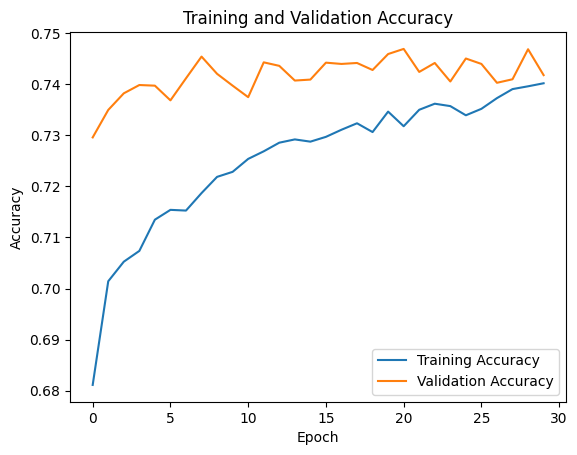

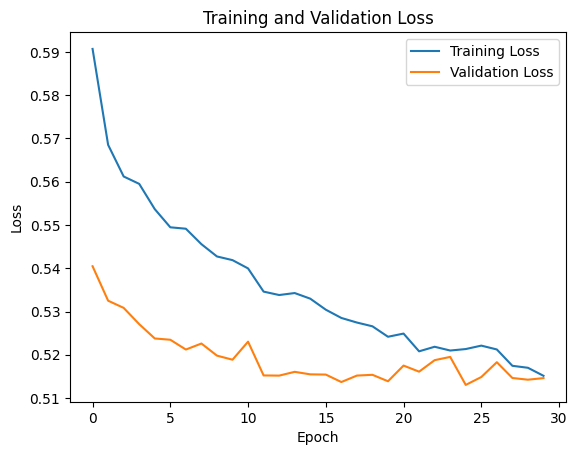

In [ ]:
# Plot training and validation accuracy
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

625/625 [==============================] - 2s 3ms/step


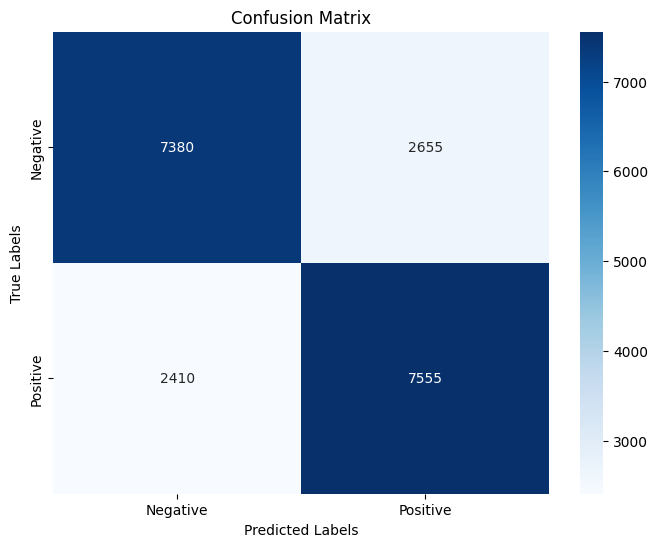

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74     10035
           1       0.74      0.76      0.75      9965

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000



In [ ]:
# Predict classes on test data
y_pred = (model_3.predict(X_test_padded) > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_numeric, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display classification report
report = classification_report(y_test_numeric, y_pred)
print("Classification Report:")
print(report)

In [ ]:
# Ensure X_test and y_test_numeric are numpy arrays
X_test_array = X_test.values if isinstance(X_test, pd.Series) else np.array(X_test)
y_test_array = y_test_numeric.values if isinstance(y_test_numeric, pd.Series) else np.array(y_test_numeric)

# Select 10 random indices
random_indices = random.sample(range(len(X_test_array)), 10)

# Prepare data for the table
table_data = []
for idx, rand_idx in enumerate(random_indices, start=1):
    sentence = X_test_array[rand_idx]
    true_label = "Positive" if y_test_array[rand_idx] == 1 else "Negative"
    predicted_label = "Positive" if y_pred[rand_idx] == 1 else "Negative"
    table_data.append([idx, sentence, true_label, predicted_label])

# Create headers for the table
headers = ["Index", "Sentence", "True Label", "Predicted Label"]

# Display the table with 'fancy_grid' format
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒═════════╤══════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════╤═══════════════════╕
│   Index │ Sentence                                                                                         │ True Label   │ Predicted Label   │
╞═════════╪══════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════╪═══════════════════╡
│       1 │ karen need hang soon                                                                             │ Positive     │ Positive          │
├─────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┼──────────────┼───────────────────┤
│       2 │ hey adam please tell something tour thank                                                        │ Positive     │ Positive          │
├─────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┼──────────────

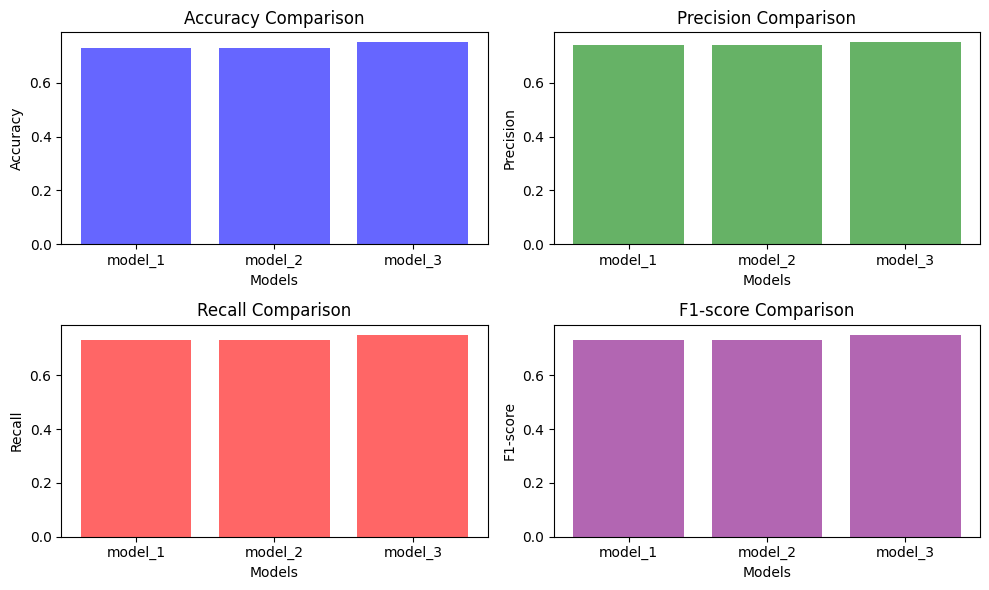

In [1]:
import matplotlib.pyplot as plt

models = ['model_1', 'model_2', 'model_3']
accuracy = [0.73, 0.73, 0.75]
precision = [0.74, 0.74, 0.75]
recall = [0.73, 0.73, 0.75]
f1_score = [0.73, 0.73, 0.75]

x = range(len(models))

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(x, accuracy, color='b', alpha=0.6)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(x, models)

plt.subplot(2, 2, 2)
plt.bar(x, precision, color='g', alpha=0.6)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.xticks(x, models)

plt.subplot(2, 2, 3)
plt.bar(x, recall, color='r', alpha=0.6)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.xticks(x, models)

plt.subplot(2, 2, 4)
plt.bar(x, f1_score, color='purple', alpha=0.6)
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.xticks(x, models)

plt.tight_layout()
plt.show()
